In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
# df.Geography.unique()

#### France : 0 , Spain : 1 , Germany: 2

In [5]:
# df.drop(columns=['RowNumber',	'CustomerId',	'Surname'], inplace=True)
# df.head(1)

In [6]:
# df.Geography = df.Geography.map({'France':0, 'Spain':1 ,'Germany': 2 })
# df.head(1)

In [7]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [8]:
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# df.Gender = encoder.fit_transform(df.Gender)
# df.head(1)


In [9]:
# df.Gender.value_counts()

#### Implies 1 == Male and 0 ==  Female

In [10]:
X = df.drop(columns=['Exited'], axis=1)
X.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88


In [11]:
y = df.Exited
y.head(1)

0    1
Name: Exited, dtype: int64

In [12]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
class FeaturesDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X,y=None):
        return self
    
    def transform(self, X):
        return X.drop(['RowNumber',	'CustomerId',	'Surname'], axis =1)


class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X,y=None):
        return self
    
    def transform(self, X):
        
        encoder = LabelEncoder()
        X['Gender'] = encoder.fit_transform(X['Gender'])
        X['Geography'] = X['Geography'].map({'France':0, 'Spain':1 ,'Germany': 2 })

        return X


In [14]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('dropper', FeaturesDropper()),
    ('endcoder', FeatureEncoder())    
])

In [15]:
df_modified = pipe.fit_transform(df)

In [16]:
df_modified.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot: >

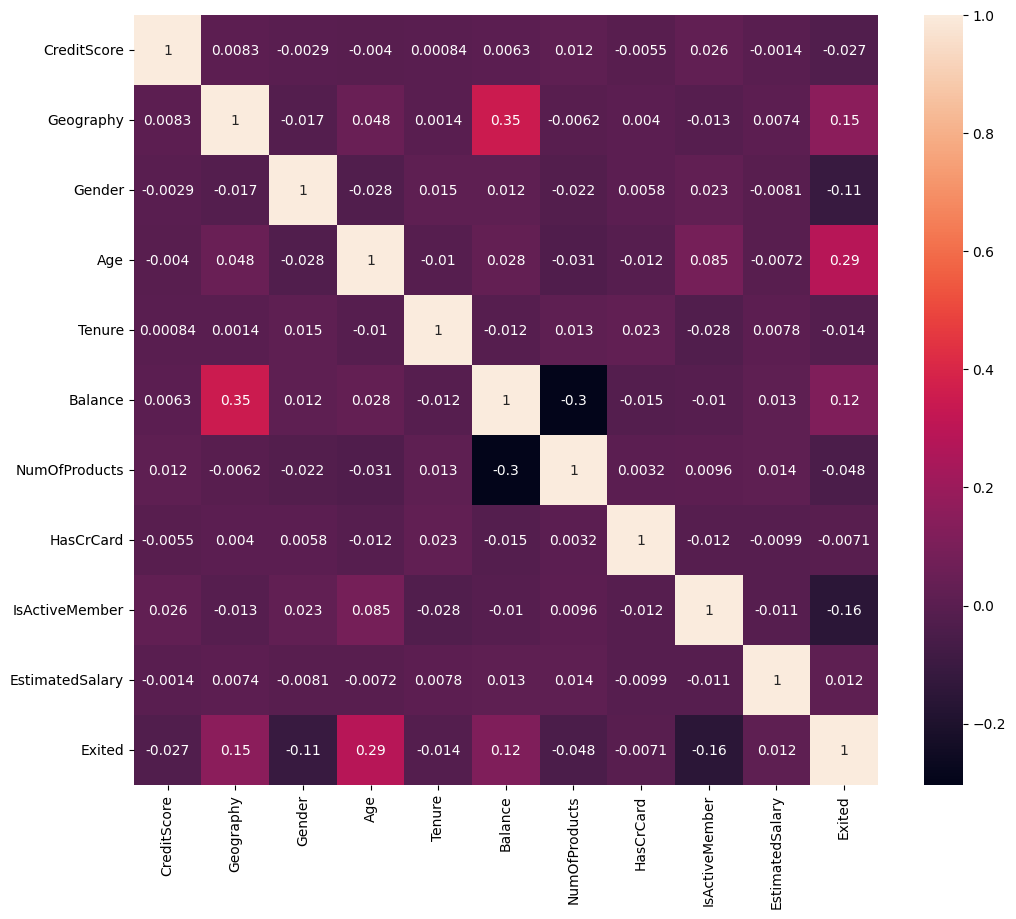

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(df_modified.corr(), annot=True)


In [18]:
# sns.pairplot(df, hue="Exited", diag_kind="hist")

In [19]:
df_modified.shape

(10000, 11)

In [20]:
X = df_modified.drop(columns=['Exited'], axis=1)
y = df.Exited

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2, stratify=y)

In [21]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [22]:
X_train

array([[ 0.68514974, -0.90616538,  0.92057219, ...,  0.6413192 ,
        -1.03016917,  1.25827285],
       [-1.79039501, -0.90616538, -1.08628092, ...,  0.6413192 ,
        -1.03016917,  1.63219531],
       [-1.11993497, -0.90616538,  0.92057219, ...,  0.6413192 ,
        -1.03016917,  1.671375  ],
       ...,
       [-1.3159156 ,  1.50843593,  0.92057219, ...,  0.6413192 ,
         0.97071435,  0.33108328],
       [ 2.05701412,  1.50843593, -1.08628092, ..., -1.55928591,
        -1.03016917, -1.62806157],
       [-1.78008024,  0.30113528, -1.08628092, ...,  0.6413192 ,
        -1.03016917, -0.96571335]])

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#### Comparing the models with default hyperparameter values using Cross Validation

In [24]:
X = scale.transform(X)

In [25]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [26]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X, y, cv=5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print('---------------------------------------------------------------')

In [27]:
compare_models_cross_validation()

Cross Validation accuracies for the LogisticRegression(max_iter=1000) = [0.808  0.811  0.808  0.822  0.8095]
Acccuracy score of the  LogisticRegression(max_iter=1000) = 81.17 %
---------------------------------------------------------------
Cross Validation accuracies for the SVC(kernel='linear') = [0.796  0.796  0.7965 0.7965 0.7965]
Acccuracy score of the  SVC(kernel='linear') = 79.63 %
---------------------------------------------------------------
Cross Validation accuracies for the KNeighborsClassifier() = [0.8225 0.8465 0.822  0.8325 0.8315]
Acccuracy score of the  KNeighborsClassifier() = 83.1 %
---------------------------------------------------------------
Cross Validation accuracies for the RandomForestClassifier(random_state=0) = [0.8585 0.8735 0.859  0.87   0.8595]
Acccuracy score of the  RandomForestClassifier(random_state=0) = 86.41 %
---------------------------------------------------------------


#### Comparing the models with different Hyperparameter values using GridSearchCV

In [28]:
# list of models
models_list = [LogisticRegression(max_iter=10000), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [29]:
# creating a dictionary that contains hyperparameter values for the above mentioned models


model_hyperparameters = {
    

    'log_reg_hyperparameters': {
        
        'C' : [1,5,10,20]
    },

    'svc_hyperparameters': {
        
        'kernel' : ['linear','poly','rbf','sigmoid'],
        'C' : [1,5,10,20]
    },


    'KNN_hyperparameters' : {
        
        'n_neighbors' : [3,5,10]
    },


    'random_forest_hyperparameters' : {
        
        'n_estimators' : [10, 20, 50, 100]
    }
}

In [30]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters']


In [31]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')


    classifier = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    classifier.fit(X,y)

    result.append({
        'model used' : model,
        'highest score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe

In [32]:
ModelSelection(models_list, model_hyperparameters)

LogisticRegression(max_iter=10000)
{'C': [1, 5, 10, 20]}
---------------------------------
SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
---------------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
---------------------------------
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100]}
---------------------------------


,model used,highest score,best hyperparameters
0,LogisticRegression(max_iter=10000),0.8117,{'C': 1}
1,SVC(),0.8562,"{'C': 5, 'kernel': 'rbf'}"
2,KNeighborsClassifier(),0.8369,{'n_neighbors': 10}
3,RandomForestClassifier(random_state=0),0.8643,{'n_estimators': 50}


#### Random Forest Classifier with n_estimators = 50 has the highest accuracy i.e 86.43

In [33]:
classifier = RandomForestClassifier(random_state=0, n_estimators=50)
classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [34]:
from sklearn.metrics import accuracy_score
x_train_pred = classifier.predict(X_train)
training_data_acc_score = accuracy_score(x_train_pred, y_train)
print(f"Accuracy score of the trainig data: {training_data_acc_score} ")

# Acc score for the test set
x_test_pred = classifier.predict(X_test)
test_data_acc_score = accuracy_score(x_test_pred, y_test)
print(f"Accuracy score of the testing data: {test_data_acc_score} ")

Accuracy score of the trainig data: 0.9992857142857143 
Accuracy score of the testing data: 0.8566666666666667 


In [38]:
# input_data = (1	,15634602	,'Hargrave',619	,'France'	,'Female'	,42	,2	,0	,1	,1	,1	,101348.88	)


# #changing data to np_array
# inp_np_array = np.asarray(input_data)
# #reshaping the array for one instance as our model is trained for 10000 data points
# inp_np_array_reshape  = inp_np_array.reshape(1,-1)
# input_data = pipe.fit_transform(input_data)



# # we need to stdiz our data we cant feed it raw data otherwise acc score may dec
# inp_std = scale.transform(inp_np_array_reshape)
# prediction = classifier.predict(inp_std)
# # if prediction[0]==0:
# #     print('Churn')
# # else:
# #     print('Nt Churn')
# prediction

AttributeError: 'tuple' object has no attribute 'drop'

In [36]:
# if prediction[0]==0:
#     print('Churn')
# else:
#     print('Nt Churn')

Churn


In [40]:
testdf = pd.read_excel('./testcsv.xlsx')
testdf.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,9816,15745431,Chinonyelum,604,France,Male,34,7,0.0,2,1,1,188078.60
1,9817,15649508,Chin,643,Spain,Male,48,8,0.0,2,1,0,174729.30
2,9818,15812611,Lorimer,690,Spain,Female,30,5,0.0,2,0,1,78700.03
3,9819,15619699,Yeh,558,France,Male,31,7,0.0,1,1,0,198269.10
4,9820,15813946,Duffy,637,Germany,Male,51,1,104682.8,1,1,0,55266.96


In [49]:
test_modified = pipe.fit_transform(testdf)
test_modified.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,604,0,1,34,7,0.0,2,1,1,188078.60
1,643,1,1,48,8,0.0,2,1,0,174729.30
2,690,1,0,30,5,0.0,2,0,1,78700.03
3,558,0,1,31,7,0.0,1,1,0,198269.10
4,637,2,1,51,1,104682.8,1,1,0,55266.96


In [42]:
test_modified = scale.transform(test_modified)
test_modified

array([[-0.48041924, -0.90616538,  0.92057219, -0.46799568,  0.68718789,
        -1.21824229,  0.79255439,  0.6413192 ,  0.97071435,  1.52659765],
       [-0.07814322,  0.30113528,  0.92057219,  0.86606222,  1.03385229,
        -1.21824229,  0.79255439,  0.6413192 , -1.03016917,  1.29420567],
       [ 0.40665096,  0.30113528, -1.08628092, -0.84915508, -0.00614091,
        -1.21824229,  0.79255439, -1.55928591,  0.97071435, -0.37752486],
       [-0.95489865, -0.90616538,  0.92057219, -0.75386523,  0.68718789,
        -1.21824229, -0.90456422,  0.6413192 , -1.03016917,  1.7039995 ],
       [-0.14003184,  1.50843593,  0.92057219,  1.15193177, -1.39279851,
         0.4581598 , -0.90456422,  0.6413192 , -1.03016917, -0.78546068],
       [-0.02656937,  1.50843593, -1.08628092,  0.58019267, -0.00614091,
         0.68562104, -0.90456422, -1.55928591, -1.03016917, -0.84865825],
       [ 0.01468971,  0.30113528,  0.92057219, -1.03973478,  1.03385229,
         1.29315001,  0.79255439,  0.6413192 

In [47]:
prediction_test = classifier.predict(test_modified)
prediction_test

array([0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [52]:
final_test_df = pd.DataFrame(testdf['RowNumber'])
final_test_df['Exited'] = prediction_test
final_test_df

,RowNumber,Exited
0,9816,0
1,9817,0
2,9818,0
3,9819,0
4,9820,1
5,9821,1
6,9822,0
7,9823,0
8,9824,0
